## Índice de suicidios 

In [1131]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas.tools import geocode
import numpy as np
sns.set()

In [1132]:
df_sucide=pd.read_csv(r'master.csv')
df_world_crime=pd.read_csv(r'crime_index_2023.csv')


In [1135]:
df_sucide.drop(columns=['HDI for year','country-year'],inplace=True)
df_sucide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [1136]:
df_sucide.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [1137]:
df_sucide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [1138]:
df_sucide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [1139]:
df_world_crime.head()

,country,crime_index,safety_index,year
0,Venezuela,85.7,14.3,2013
1,Guatemala,84.9,15.1,2013
2,Trinidad And Tobago,83.6,16.4,2013
3,South Africa,76.7,23.3,2013
4,Kenya,74.3,25.7,2013


In [1140]:
#Cambio de mayusculas y nombres en la columna country para realizar el merge con el dataset 'world_crime'
df_world_crime.loc[df_world_crime['country'].str.contains('Trinidad And Tobago',na=False), 'country'] = 'Trinidad and Tobago'
df_world_crime.loc[df_world_crime['country'].str.contains('Russia',na=False), 'country'] = 'Russian Federation'	
df_world_crime.loc[df_world_crime['country'].str.contains('Bosnia And Herzegovina',na=False), 'country'] = 'Bosnia and Herzegovina'

In [1141]:
print('years in  df_world_crime',df_world_crime.year.unique())
print('years in  df_sucide' , df_sucide.year.unique())

years in  df_world_crime [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
years in  df_sucide [1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]


## EDA

### Comportamiento mundial del suicuidio (1987-2016)

In [ ]:
#Agrupacion de los datos
df_comp = df_sucide.pivot_table(['suicides/100k pop'],index=['year','country'],aggfunc='mean').reset_index()
df_comp.columns = ['year','country','suicides/100k pop']

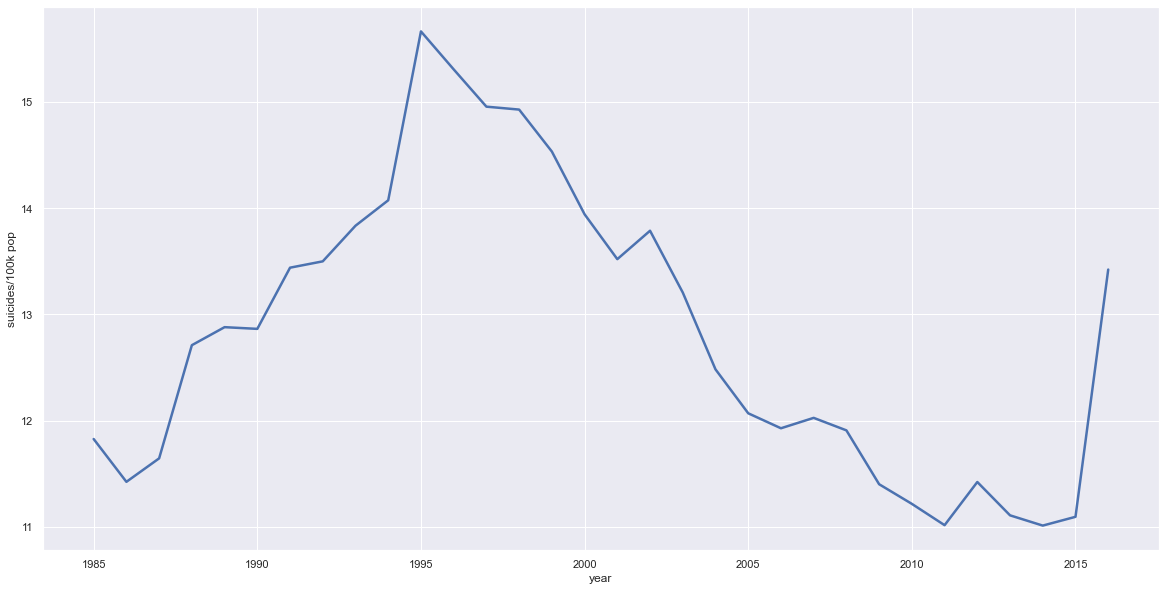

In [1142]:
plt.figure(figsize=(20,10))
ax=sns.lineplot(data=df_comp,x=df_comp['year'],y=df_comp['suicides/100k pop'],linewidth = 2.5, markers=True,ci=None)

Como se puede notar en el grafico desde el año 1995 existe una tendencia a la baja del promedio de suicidios cada 100k personas, sin embargo a partir del año 2015 es notable un alza

### Numero total de suicidios por país (1987-2016)

El gráfico debajo muestra el número total de suicidios en hombres y mujeres agrupado por países desde 1987 hasta 2016

In [1143]:
#Agrupacion de los datos por suicidios, sexo y países
suicides_max=df_sucide.pivot_table('suicides_no',index=['country','sex'],aggfunc='sum').sort_values(by=['suicides_no','country'],ascending=False).reset_index()
suicides_max.columns = ['country','sex','suicides rate']

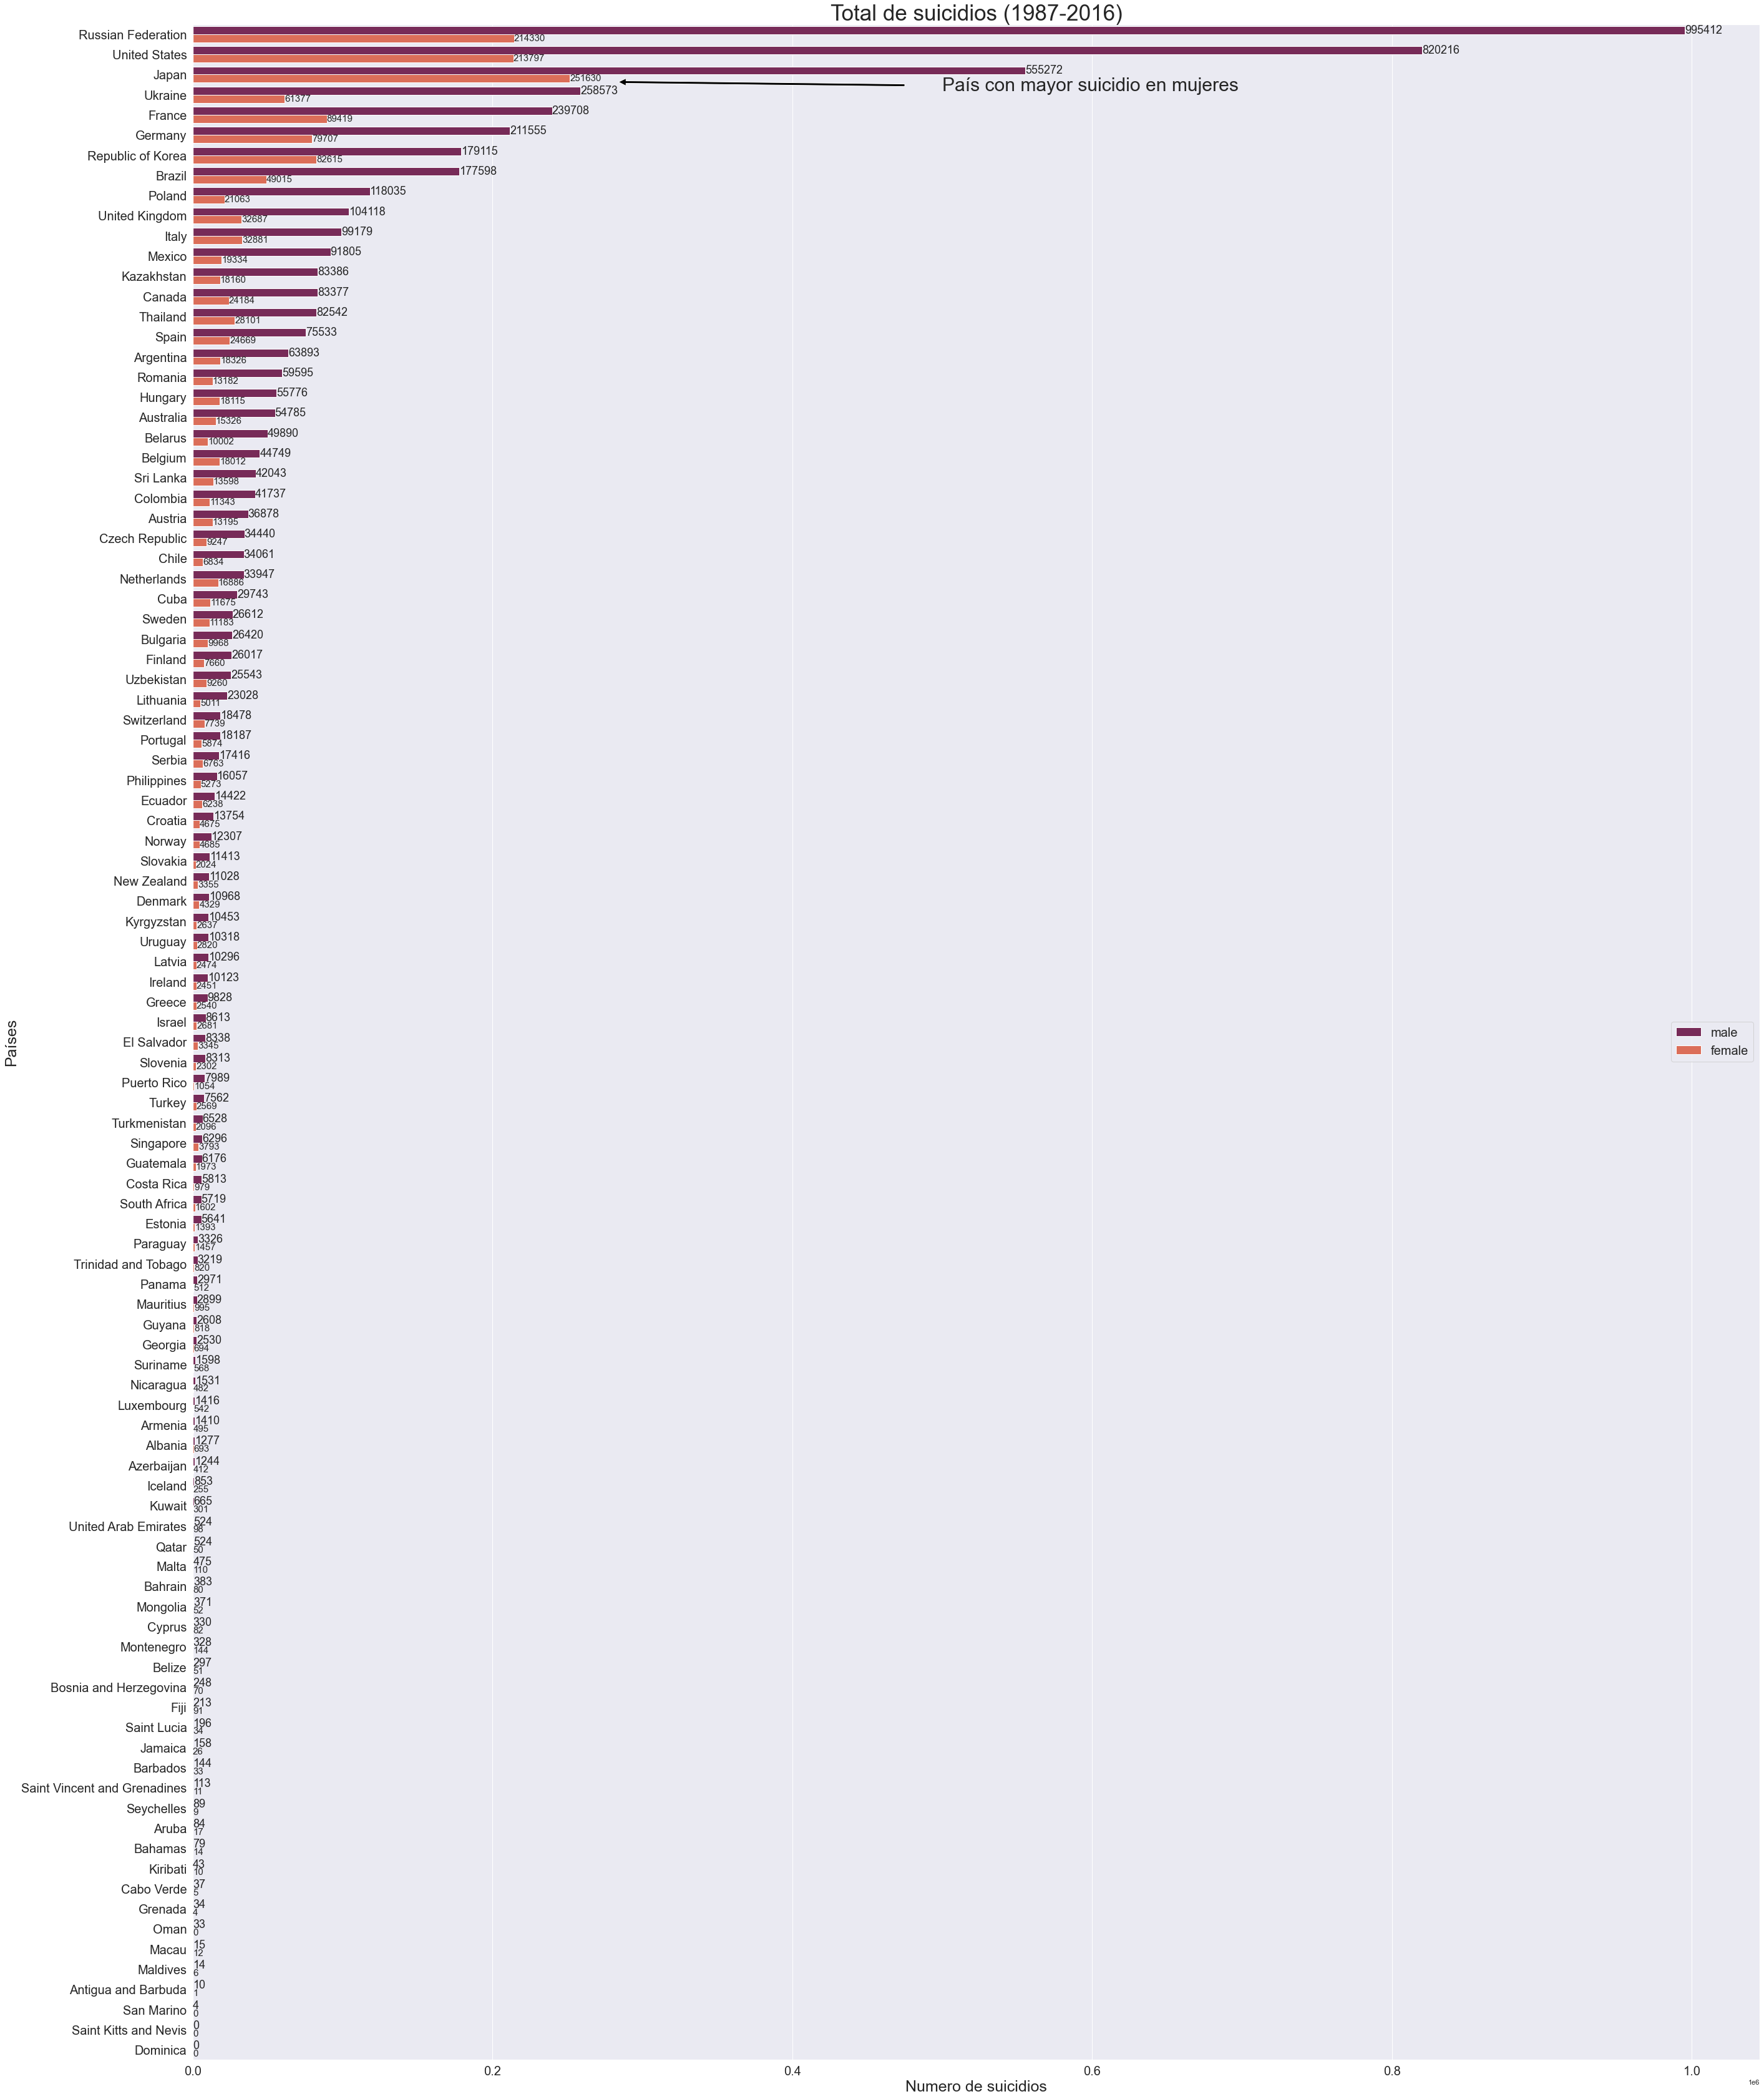

In [1144]:
plt.figure(figsize=(45,60))
ax=sns.barplot(data=suicides_max,x=suicides_max['suicides rate'],y=suicides_max['country'],palette='rocket',hue='sex')#orient = 'h')
ax.bar_label(ax.containers[0], label_type='edge',size=18)
ax.bar_label(ax.containers[1], label_type='edge',size=15)
plt.title("Total de suicidios (1987-2016)", size=35)
ax.legend(loc='center right',fontsize="20")
plt.annotate('País con mayor suicidio en mujeres',xy=(0.26*10**6,2.35),xytext=(0.5*10**6,2.8),size=30,arrowprops=dict(facecolor='black',shrink=0.1))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Países",size=25)
plt.xlabel("Numero de suicidios",size=25)
plt.show()


##### Suicidios agrupados por sexo

In [1145]:
#Agruapacion de los datos por suicidios y sexo
suicides_sex=df_sucide.pivot_table('suicides_no',index=['sex'],aggfunc='sum').sort_values(by=['suicides_no'],ascending=False).reset_index()
suicides_sex.columns = ['sex','suicides_no']

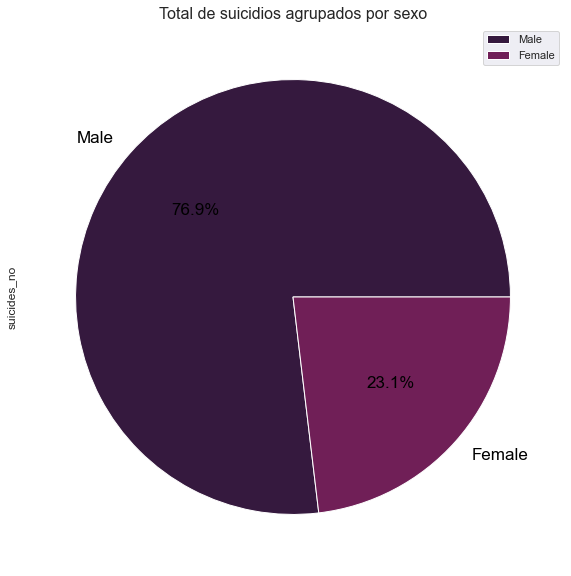

In [1146]:
palette_color = sns.color_palette("rocket")
labels = ['Male','Female']
suicides_sex.plot(kind='pie',y='suicides_no',figsize=(10,10),autopct='%1.1f%%',colors=palette_color,textprops={'color':"black",'fontsize':'17'},labels=labels)
plt.title("Total de suicidios agrupados por sexo",size=16)
plt.show()

##### Número total de suicidios por edad

In [1147]:
#Agrupacion por edades
suicides_age=df_sucide.pivot_table('suicides_no',index=['age','sex'],aggfunc='sum').sort_values(by=['suicides_no'],ascending=False).reset_index()
suicides_age.columns = ['age','sex','suicides_no']

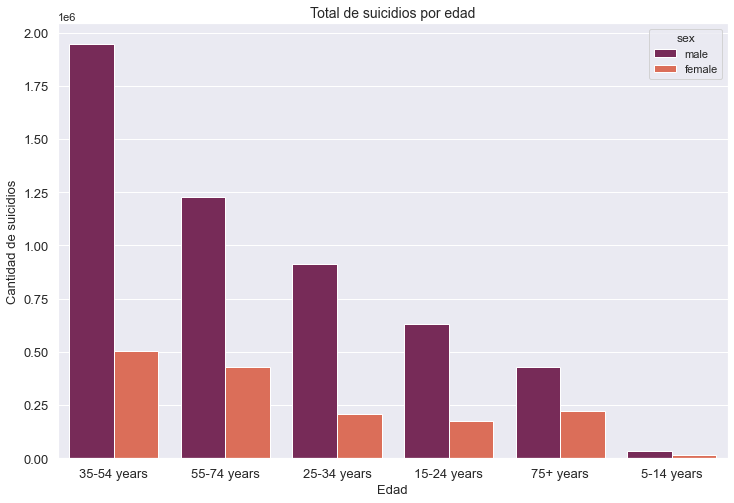

In [1148]:
plt.figure(figsize=(12,8))
ax=sns.barplot(data=suicides_age,x=suicides_age['age'],y=suicides_age['suicides_no'],hue=suicides_age['sex'],palette='rocket')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Total de suicidios por edad",size=14)
plt.ylabel("Cantidad de suicidios",size=13)
plt.xlabel("Edad",size=13)
plt.show()

##### Número total de suicidios por generación

In [1149]:
#Agrupacion por generacion
suicides_gen=df_sucide.pivot_table('suicides_no',index=['generation','sex'],aggfunc='sum').sort_values(by=['suicides_no'],ascending=False).reset_index()
suicides_gen.columns = ['generation','sex','suicides_no']

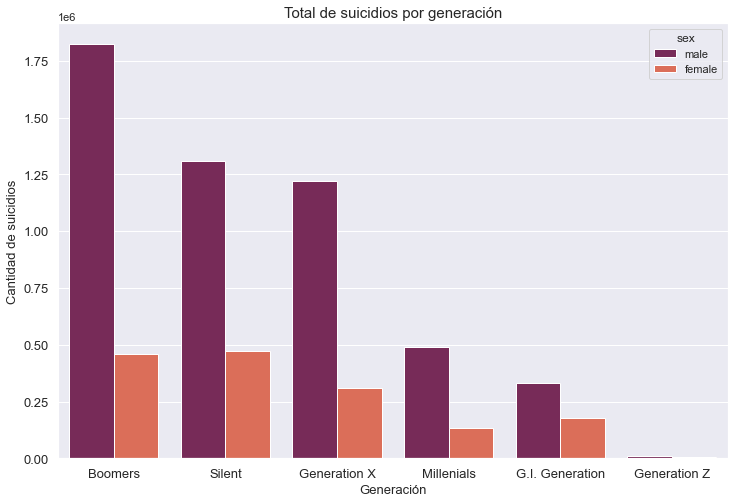

In [1150]:
plt.figure(figsize=(12,8))
ax=sns.barplot(data=suicides_gen,x=suicides_gen['generation'],y=suicides_gen['suicides_no'],hue=suicides_gen['sex'],palette='rocket')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Total de suicidios por generación",size=15)
plt.ylabel("Cantidad de suicidios",size=13)
plt.xlabel("Generación",size=13)
plt.show()

### Promedio de suicidios cada 100k personas 

Las tablas siguientes indican a los 20 países con más y menos suicidios cada 100K personas

##### 20 países con mayor tasa de suicidios

In [1151]:
# Promedio de suicidios cada 100k personas 
suicides_100mean=df_sucide.pivot_table('suicides/100k pop',index=['country'],
aggfunc='mean',).sort_values(by=['suicides/100k pop'],
ascending=False).reset_index().iloc[0:20]
suicides_100mean.columns = ['Country','Mean Suicides 100kpop']
suicides_100mean.style.background_gradient(cmap='rocket', subset=['Mean Suicides 100kpop'])

,Country,Mean Suicides 100kpop
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


##### 20 países con menor tasa de suicidos

In [1152]:
# Promedio de suicidios cada 100k personas 
suicides_100meaneg=df_sucide.pivot_table('suicides/100k pop',index=['country'],
aggfunc='mean',).sort_values(by=['suicides/100k pop'],
ascending=False).reset_index().iloc[-20:]
suicides_100meaneg.columns = ['Country','Mean Suicides 100kpop']
suicides_100meaneg.style.background_gradient(cmap='rocket', subset=['Mean Suicides 100kpop'])

,Country,Mean Suicides 100kpop
81,Cyprus,3.293596
82,Armenia,3.275872
83,Guatemala,3.185278
84,Barbados,2.970433
85,Philippines,2.421278
86,Turkey,2.371071
87,Grenada,2.132258
88,Azerbaijan,1.855417
89,Bahrain,1.854127
90,Qatar,1.787360


#### Comportamiento del sucidio 

Usando los datos de las tablas anteriores se filtra el df para obtener el comportamiento del suicidio de 1987 hasta 2016 en los países con tasas de suicidios altas y bajas

In [1153]:
#Lista de los países con mayor tasa de suicidio 
filt20=list(map(str,suicides_100mean['Country']))
#Filtrando los datos con la lista anterior 
df_top20max=df_sucide[df_sucide['country'].isin(filt20)]
#Agrupación de datos 
df_top20max=df_top20max.pivot_table('suicides/100k pop',index=['year','country'],aggfunc='sum').sort_values(by=['suicides/100k pop'],ascending=False).reset_index()
df_top20max.columns=['year','country','suicides_rate']

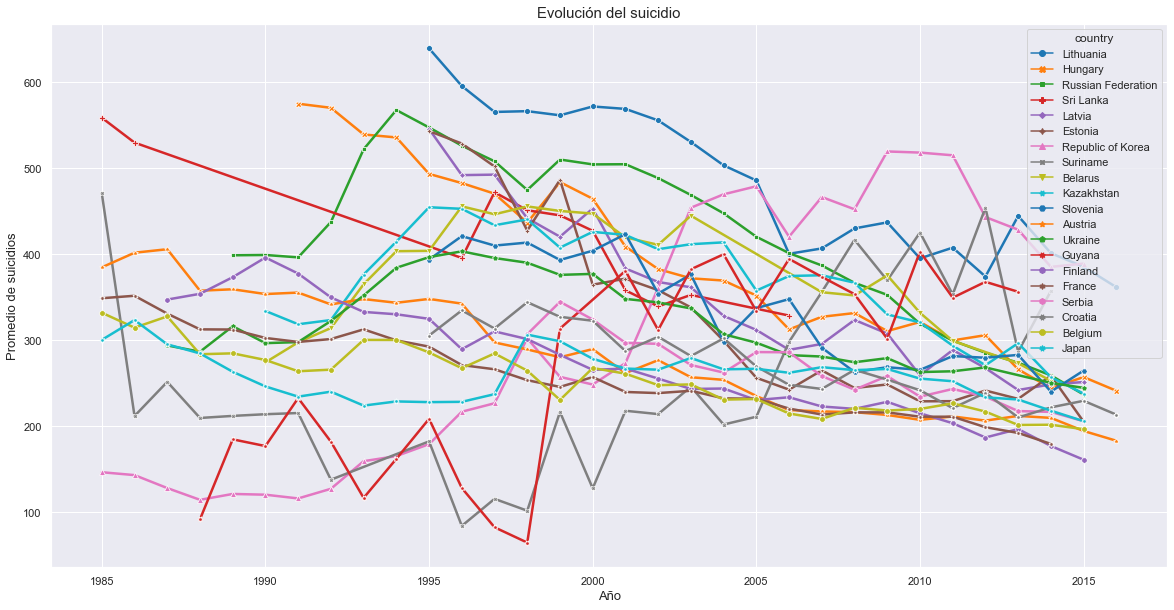

In [1154]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_top20max,x=df_top20max['year'],y=df_top20max['suicides_rate'],hue=df_top20max['country'],palette="tab10",linewidth = 2.5, style = df_top20max['country'], markers=True
            , dashes=False,ci=False)
plt.title("Evolución del suicidio",size=15)
plt.ylabel("Promedio de suicidios",size=13)
plt.xlabel("Año",size=13)
plt.show()

##### Comportamiento del sucidio en países con menor promedio del suicidio cada 100k personas 

In [1155]:
#Lista de los países con menor tasa de suicidio 
filt20=list(map(str,suicides_100meaneg['Country']))
#Filtrando los datos con la lista anterior 
df_top20=df_sucide[df_sucide['country'].isin(filt20)]
#Agrupación de datos 
df_top20=df_top20.pivot_table('suicides/100k pop',index=['year','country'],aggfunc='sum').sort_values(by=['suicides/100k pop'],ascending=False).reset_index()
df_top20.columns=['year','country','suicides_rate']

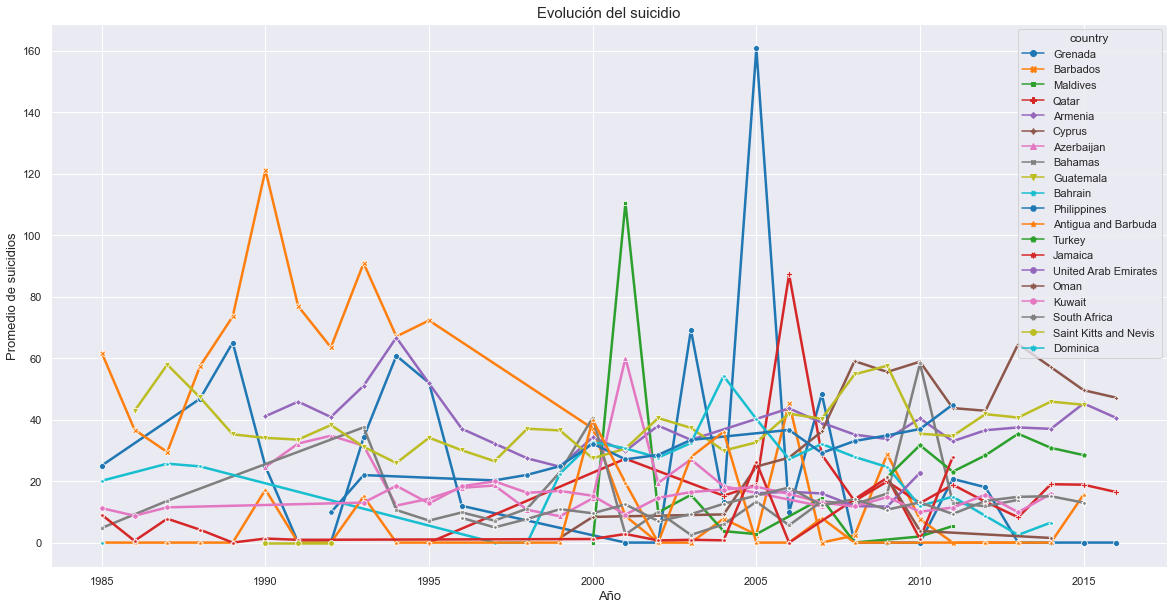

In [1156]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_top20,x=df_top20['year'],y=df_top20['suicides_rate'],hue=df_top20['country'],palette="tab10",linewidth = 2.5, style = df_top20['country'], markers=True
            , dashes=False)
plt.title("Evolución del suicidio",size=15)
plt.ylabel("Promedio de suicidios",size=13)
plt.xlabel("Año",size=13)
plt.show()

#### Tendencia del suicidio en los países con mayores índices 

#### Lithuania

In [1157]:
lit=df_top20max[df_top20max['country'] == 'Lithuania']

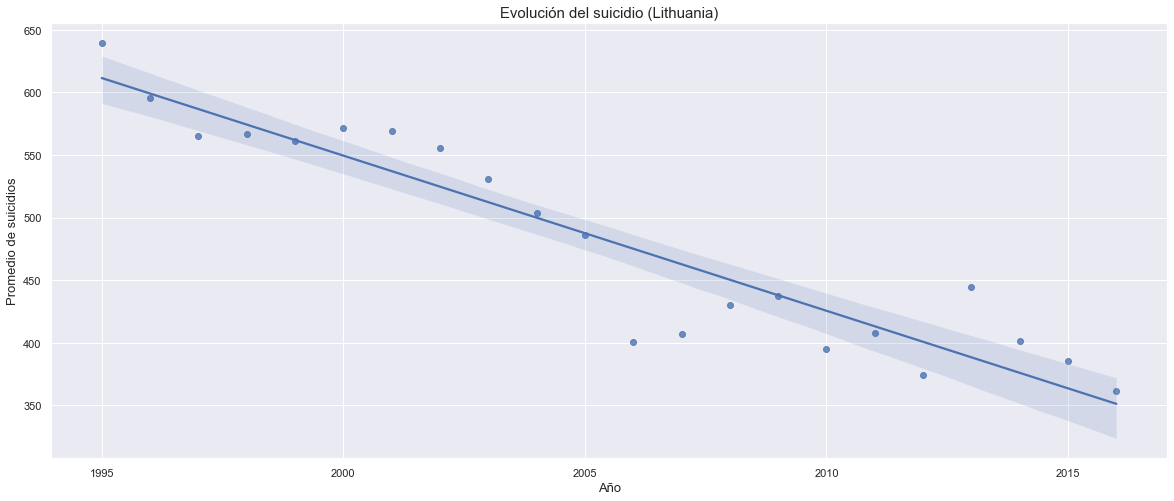

In [1158]:
plt.figure(figsize=(20,8))
sns.regplot(data=lit,x=lit['year'],y=lit['suicides_rate'])
plt.title("Evolución del suicidio (Lithuania)",size=15)
plt.ylabel("Promedio de suicidios",size=13)
plt.xlabel("Año",size=13)
plt.show()

In [1159]:
import statsmodels.formula.api as smf
model = smf.ols(formula='suicides_rate ~ year', data=lit).fit()    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides_rate   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.61e-10
Time:                        22:45:41   Log-Likelihood:                -105.74
No. Observations:                  22   AIC:                             215.5
Df Residuals:                      20   BIC:                             217.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.534e+04   2091.667     12.115      0.0

#### Hungary

In [ ]:
Hun=df_top20max[df_top20max['country'] == 'Hungary']

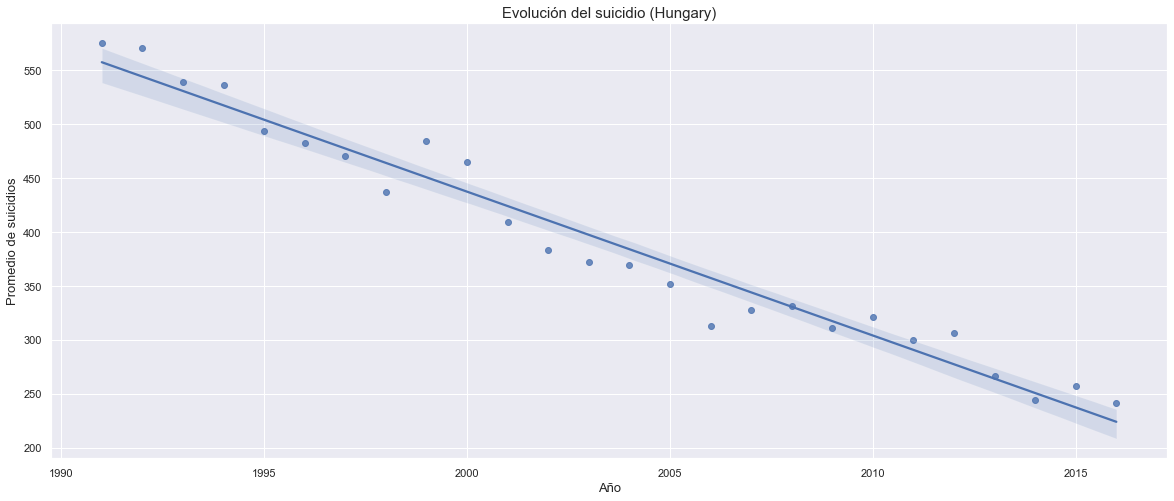

In [1184]:
plt.figure(figsize=(20,8))
sns.regplot(data=Hun,x=Hun['year'],y=Hun['suicides_rate'])
plt.title("Evolución del suicidio (Hungary)",size=15)
plt.ylabel("Promedio de suicidios",size=13)
plt.xlabel("Año",size=13)
plt.show()

In [1179]:
model = smf.ols(formula='suicides_rate ~ year', data=Hun).fit()    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides_rate   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     584.1
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.35e-18
Time:                        22:46:39   Log-Likelihood:                -115.14
No. Observations:                  26   AIC:                             234.3
Df Residuals:                      24   BIC:                             236.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.712e+04   1105.900     24.520      0.0

#### Rusia 

In [1183]:
Russ=df_top20max[df_top20max['country'] == 'Russian Federation']

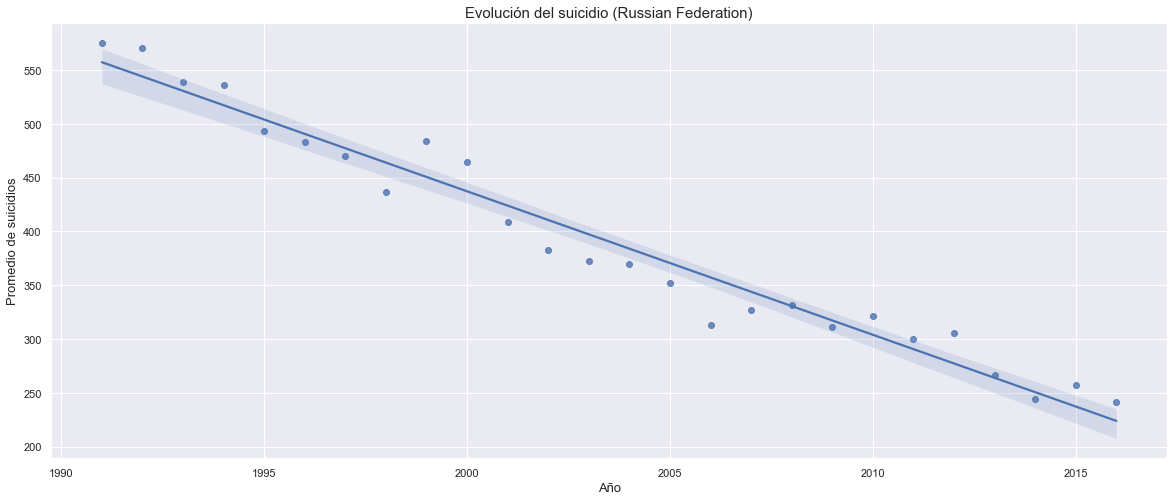

In [1186]:
plt.figure(figsize=(20,8))
sns.regplot(data=Hun,x=Hun['year'],y=Hun['suicides_rate'])
plt.title("Evolución del suicidio (Russian Federation)",size=15)
plt.ylabel("Promedio de suicidios",size=13)
plt.xlabel("Año",size=13)
plt.show()

In [1187]:
model = smf.ols(formula='suicides_rate ~ year', data=Russ).fit()    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides_rate   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     28.22
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.67e-05
Time:                        23:02:13   Log-Likelihood:                -150.56
No. Observations:                  27   AIC:                             305.1
Df Residuals:                      25   BIC:                             307.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.787e+04   3284.828      5.439      0.0

##### PIB per capita y promedio de suicidios

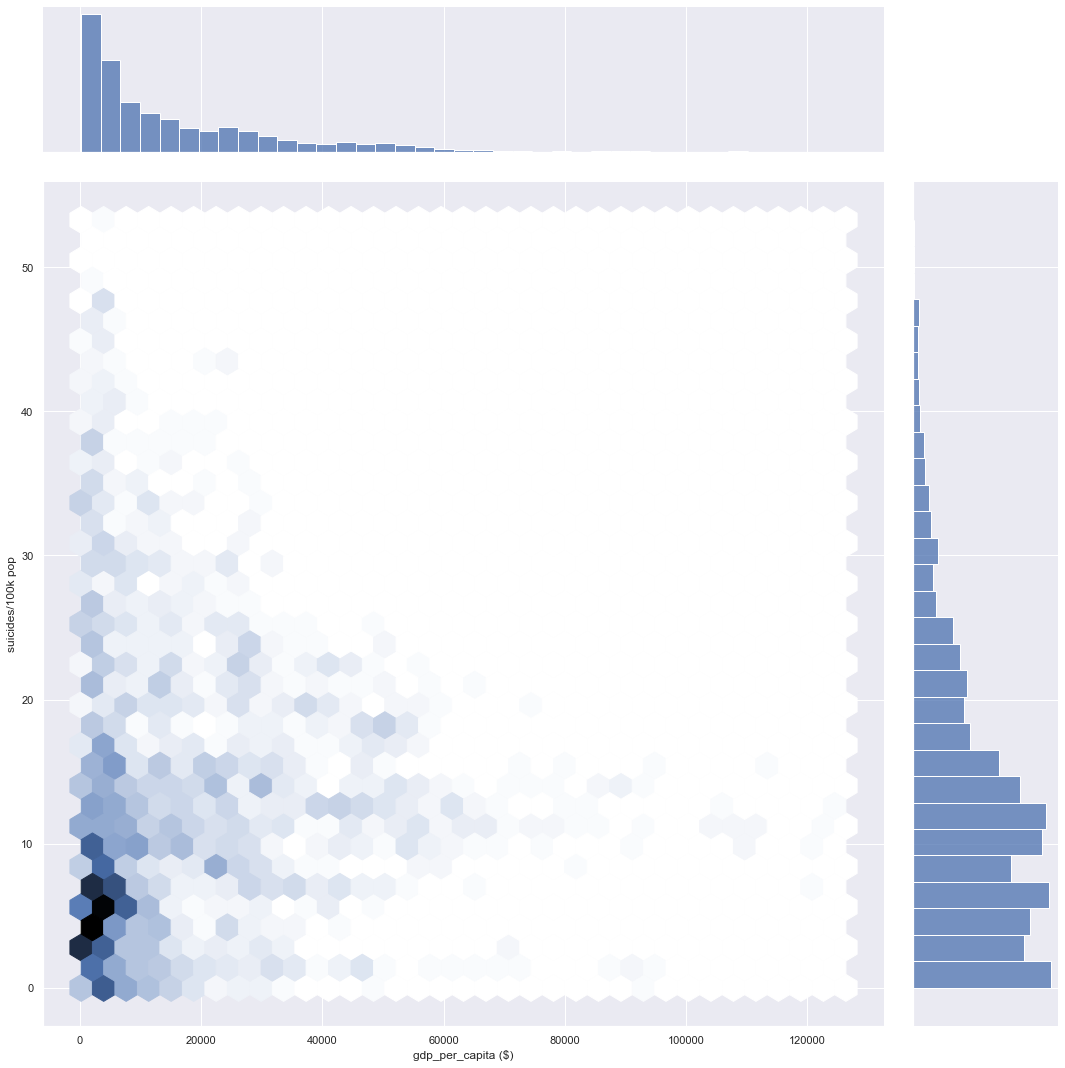

In [1189]:
df_gdp_suicides = df_sucide.pivot_table(['suicides/100k pop','gdp_per_capita ($)'],index=['year','country'],aggfunc={'suicides/100k pop':['mean'],'gdp_per_capita ($)':['mean']}).reset_index()
df_gdp_suicides.columns = ['year','country','gdp_per_capita ($)','suicides/100k pop']
sns.jointplot(data=df_gdp_suicides,x=df_gdp_suicides['gdp_per_capita ($)'],y=df_gdp_suicides['suicides/100k pop'],kind='hex',height=15)
plt.show()

En el gráfico se observa una notable correlación de los suicidios con el PIB per cápita.
Para poder determinarlo, se procede a el cálculo del ceoficiente de correlacion de Spearman:

In [1162]:
from scipy import stats

In [1163]:
r, p = stats.spearmanr(df_gdp_suicides['gdp_per_capita ($)'], df_gdp_suicides['suicides/100k pop'])
print(f"Correlación Spearman: r={r}, p-value={p}")

Correlación Spearman: r=0.1279541363588124, p-value=6.149927001744945e-10


En este test, se considera como hipótesis nula que las variables son independientes, y como hipótesis alternativa, que sí existe relación (coeficiente de correlación poblacional ≠ 0).

En este caso el p-valor es menor a 0.05 por lo que se procede a rechar la hipotesis nula

La correlacion es ligera

##### Promedios de suicidios vs promedio de indices de criminalidad

In [1164]:
# Promedios de suicidos por cada 100k personas 
suicides_100mean=df_sucide.pivot_table('suicides/100k pop',index=['country'],
aggfunc='mean',).sort_values(by=['suicides/100k pop'],
ascending=False).reset_index()
suicides_100mean.columns = ['Country','Mean Suicides 100kpop']

In [1165]:
# Promedio de indices de crimen 
df_world_crime=df_world_crime.pivot_table('crime_index',index=['country'],
aggfunc='mean').reset_index()
df_world_crime.columns = ['Country', 'Index']

In [1166]:
#Merge de los datos 
datamerge = df_world_crime.merge(suicides_100mean,how='inner',on='Country')
datamerge.head(10)

,Country,Index,Mean Suicides 100kpop
0,Albania,44.863636,3.502879
1,Argentina,62.090909,10.469328
2,Armenia,27.518182,3.275872
3,Australia,42.881818,12.992806
4,Austria,24.527273,23.759764
5,Azerbaijan,32.318182,1.855417
6,Bahamas,64.366667,1.247391
7,Bahrain,29.690909,1.854127
8,Barbados,45.825000,2.970433
9,Belarus,35.481818,31.075913


##### Suicidios en paises con indices altos de criminalidad

In [1167]:
meanp=datamerge[datamerge['Index'] >= datamerge['Index'].mean()]
print('Media de suicidios cada 100k personas en paises con indices altos de criminalidad:' , meanp['Mean Suicides 100kpop'].mean())
print('Desviación estandar:' , meanp['Mean Suicides 100kpop'].std())

Media de suicidios cada 100k personas en paises con indices altos de criminalidad: 10.850373164809497
Desviación estandar: 8.85295083295107


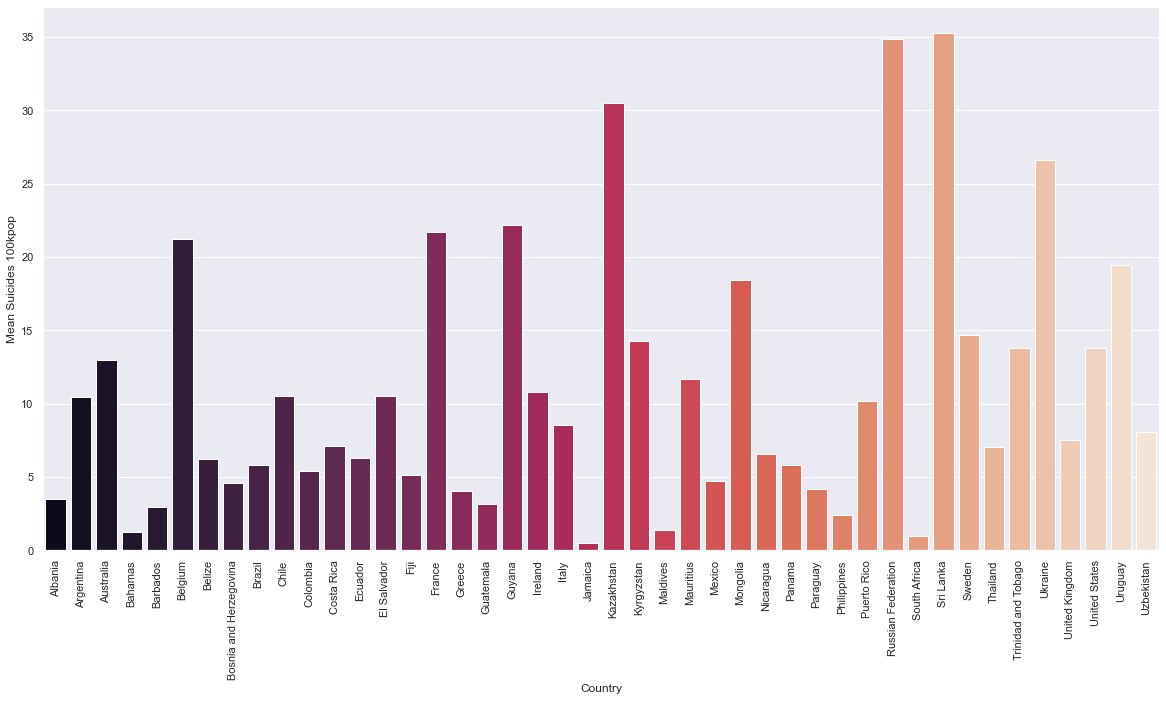

In [1168]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=meanp,x=meanp['Country'],y=meanp['Mean Suicides 100kpop'],palette='rocket')
ax.tick_params(axis='x', labelrotation = 90)

##### Suicidios en paises con indices bajos de criminalidad

In [1169]:
meanm=datamerge[datamerge['Index'] <= datamerge['Index'].mean()]
print('Media de suicidios cada 100k personas en paises con indices bajos de criminalidad:' , meanm['Mean Suicides 100kpop'].mean())
print('Desviacion estandar:' , meanm['Mean Suicides 100kpop'].std())

Media de suicidios cada 100k personas en paises con indices bajos de criminalidad: 14.464790027758777
Desviacion estandar: 9.8314462287703


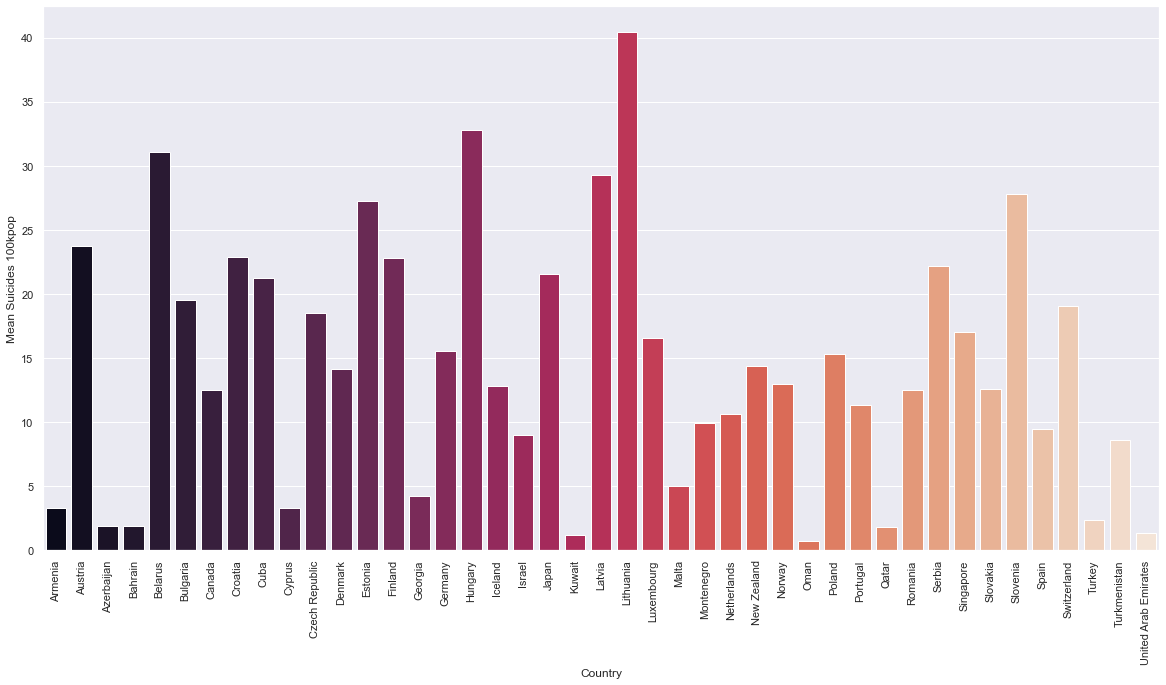

In [1170]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=meanm,x=meanm['Country'],y=meanm['Mean Suicides 100kpop'],palette='rocket')
ax.tick_params(axis='x', labelrotation = 90)

Me pareció interesante contrastar si en los países con índices de criminalidad altos existe una disminución o no de los suicidios, para demostrarlo se procede a realizar una prueba de hipótesis.
Primero revisaremos la normalidad de los datos para después aplicar el t test:


#### Pruebas de normalidad

##### Pruebas gráficas

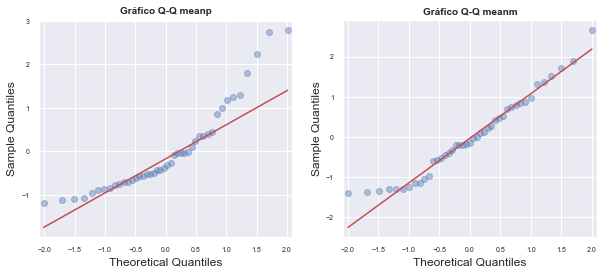

In [1171]:
# Gráfico Q-Q
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    meanp['Mean Suicides 100kpop'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q meanp', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    meanm['Mean Suicides 100kpop'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q meanm', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

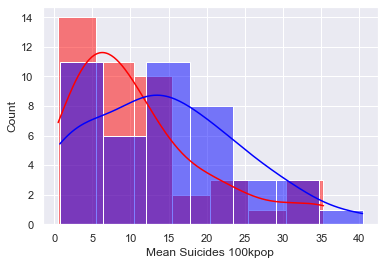

In [1172]:
sns.histplot(meanp['Mean Suicides 100kpop'],kde=True,color='red')
sns.histplot(meanm['Mean Suicides 100kpop'],kde=True,color='blue')
plt.show()

##### Shapiro-Wilk test

In [1173]:
print('Normalidad en los datos:',stats.shapiro(meanm['Mean Suicides 100kpop']))

Normalidad en los datos: ShapiroResult(statistic=0.9555597901344299, pvalue=0.09528225660324097)


In [1174]:
print('No hay normalidad en los datos:', stats.shapiro(meanp['Mean Suicides 100kpop']))

No hay normalidad en los datos: ShapiroResult(statistic=0.8669005632400513, pvalue=0.00012117580627091229)


Normalizacion de los datos

In [1175]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

In [1176]:
meanp = scaler.fit_transform(np.array(meanp['Mean Suicides 100kpop'].values.reshape(-1, 1)))
meanm = scaler.fit_transform(np.array(meanm['Mean Suicides 100kpop'].values.reshape(-1, 1)))

### Contraste de hipotesis

In [1177]:
meanp=pd.DataFrame(meanp).sample(20)
meanm=pd.DataFrame(meanm).sample(20)

### T test 

In [1178]:
stats.ttest_rel(meanp,meanm,alternative='two-sided')

Ttest_relResult(statistic=array([0.21852623]), pvalue=array([0.82934921]))

Dado que p-value es mayor que el nivel de significancia alpha (0.05) , no se dispone de evidencia suficiente para considerar que existe una diferencia real entre los datos contrastados